#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
### Lección 5 -  Entrenando Redes Neuronales Profundas parte I






In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime

In [4]:
dataset_path = keras.utils.get_file('auto-mpg.data', 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

In [5]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
print(dataset)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [18]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [9]:
x = np.asanyarray(dataset.drop(columns=['MPG']))
y = np.asanyarray(dataset[['MPG']])
x = StandardScaler().fit_transform(x)
print(x.shape)
print(y.shape)

(392, 9)
(392, 1)


In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,
                                                random_state=0)

In [9]:
def build_model():

  model = keras.Sequential()
  model.add(keras.layers.Dense(128, kernel_initializer='glorot_uniform', 
                               activation='relu', input_shape=[x.shape[1]]))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(32, activation='tanh'))
  model.add(keras.layers.Dense(1, activation='linear'))

  model.compile(loss='mean_squared_error',
                optimizer=keras.optimizers.Adam())
  return  model


In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [11]:
log_dir = "DL_L05/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(xtrain, ytrain,
                    batch_size=150, epochs=3000, 
                    validation_split=0.2, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/3000
2/2 [==============================] - 2s 530ms/step - loss: 608.9489 - val_loss: 632.5763
Epoch 2/3000
2/2 [==============================] - 0s 172ms/step - loss: 594.2438 - val_loss: 616.7498
Epoch 3/3000
2/2 [==============================] - 0s 125ms/step - loss: 579.4623 - val_loss: 601.1671
Epoch 4/3000
2/2 [==============================] - 0s 109ms/step - loss: 565.9936 - val_loss: 585.8315
Epoch 5/3000
2/2 [==============================] - 0s 216ms/step - loss: 552.6283 - val_loss: 570.8068
Epoch 6/3000
2/2 [==============================] - 0s 109ms/step - loss: 539.8564 - val_loss: 556.0341
Epoch 7/3000
2/2 [==============================] - 0s 109ms/step - loss: 524.5105 - val_loss: 541.5433
Epoch 8/3000
2/2 [==============================] - 0s 115ms/step - loss: 511.4513 - val_loss: 527.3273
Epoch 9/3000
2/2 [==============================] - 0s 141ms/step - loss: 499.1780 - val_loss: 513.4234
Epoch 10/3000
2/2 [==============================] - 0s 125ms/st

In [17]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


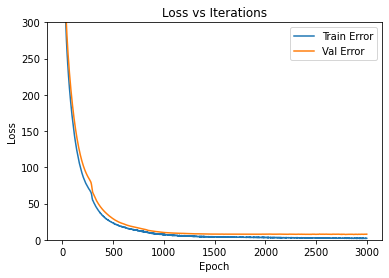

In [13]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.title('Loss vs Iterations')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,300])
  plt.legend()

plot_history(history)

In [14]:
score = model.evaluate(xtest, ytest)

3/3 [==============================] - 0s 0s/step - loss: 8.1495


Epoch 1/3000
2/2 [==============================] - 2s 291ms/step - loss: 617.0870 - val_loss: 639.6257
Epoch 2/3000
2/2 [==============================] - 0s 47ms/step - loss: 602.0446 - val_loss: 626.5073
Epoch 3/3000
2/2 [==============================] - 0s 47ms/step - loss: 590.0649 - val_loss: 613.6580
Epoch 4/3000
2/2 [==============================] - 0s 109ms/step - loss: 578.3594 - val_loss: 601.0427
Epoch 5/3000
2/2 [==============================] - 0s 125ms/step - loss: 566.4642 - val_loss: 588.6657
Epoch 6/3000
2/2 [==============================] - 0s 78ms/step - loss: 554.8576 - val_loss: 576.5134
Epoch 7/3000
2/2 [==============================] - 0s 47ms/step - loss: 543.7017 - val_loss: 564.5317
Epoch 8/3000
2/2 [==============================] - 0s 47ms/step - loss: 531.9320 - val_loss: 552.6269
Epoch 9/3000
2/2 [==============================] - 0s 47ms/step - loss: 520.9641 - val_loss: 540.7926
Epoch 10/3000
2/2 [==============================] - 0s 94ms/step - lo

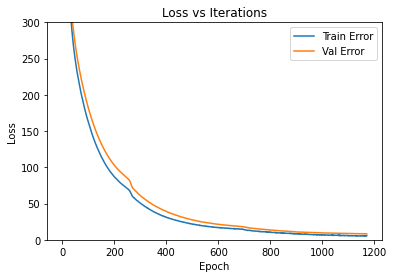

In [15]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20)
model = build_model()
history = model.fit(xtrain, ytrain,
                    batch_size=150, epochs=3000, 
                    validation_split=0.2, verbose=1, callbacks=[es])
plot_history(history)
score = model.evaluate(xtest, ytest)

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir history

In [ ]:
model.predict